In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split # 샘플 / 검증 데이터 분리 라이브러리
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # 정확도를 구하는 함수

In [254]:
insu = pd.read_csv('../data/insurance22.csv', encoding='utf-8')

In [255]:
insu

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,1rthwest,21984.47061
4,32,1,28.880,0,no,1rthwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1rthwest,10600.54830
1334,18,0,31.920,0,no,1rtheast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [256]:
y = insu.loc[:,'smoker']  # 답안지 - 1차원배열
x = insu.loc[:,['bmi','charges']]  # feature - 2차원배열

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,shuffle=True)

In [258]:
clf = SVC()
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [259]:
test_data = x_test

test_label = clf.predict(x_test)
print("정답률 : ", accuracy_score(y_test, test_label))

정답률 :  0.8134328358208955


In [260]:
insu

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,1rthwest,21984.47061
4,32,1,28.880,0,no,1rthwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1rthwest,10600.54830
1334,18,0,31.920,0,no,1rtheast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [261]:
insu.sort_values(by='charges', ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,0,47.410,0,yes,southeast,63770.42801
1300,45,1,30.360,0,yes,southeast,62592.87309
1230,52,1,34.485,3,yes,1rthwest,60021.39897
577,31,0,38.095,1,yes,1rtheast,58571.07448
819,33,0,35.530,0,yes,1rthwest,55135.40209
...,...,...,...,...,...,...,...
22,18,1,34.100,0,no,southeast,1137.01100
663,18,1,33.660,0,no,southeast,1136.39940
1244,18,1,33.330,0,no,southeast,1135.94070
808,18,1,30.140,0,no,southeast,1131.50660


In [262]:
import seaborn as sns

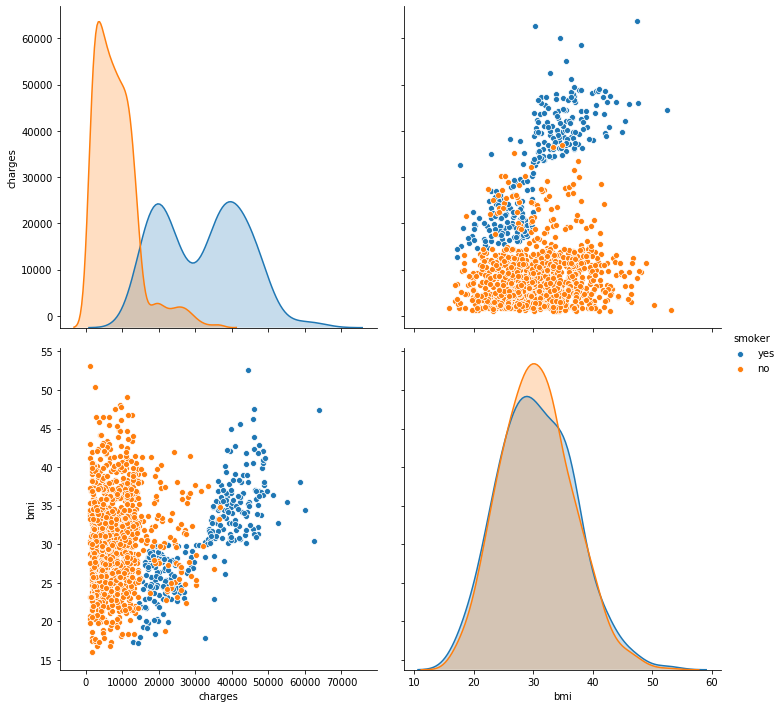

In [263]:
sns.pairplot(insu, hue='smoker', vars=['charges','bmi'], height=5)

In [264]:
data = insu[['bmi','charges']]

In [265]:
data

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [266]:
insu.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [267]:
correct = insu[['smoker']]

In [268]:
from sklearn.tree import DecisionTreeClassifier

In [269]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=10)

In [270]:
tree_clf.fit(data, correct)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [271]:
from sklearn.tree import export_graphviz

In [291]:
export_graphviz(
    tree_clf,
    out_file='insu_tree.dot',
    feature_names=['bmi','charges'],
    class_names=['no','yes'],
    rounded=True,
    filled=True
)

In [292]:
import graphviz

In [293]:
with open('insu_tree.dot') as f:
    dot_graph = f.read()

In [294]:
dot = graphviz.Source(dot_graph)

In [295]:
dot.format = 'png'

In [296]:
dot.render(filename='insu_tree', directory='images/tree', cleanup=True)

'images/tree\\insu_tree.png'